In [33]:
import pandas as pd
from dataviz import data_slice,data_slice_year,data_slice_date,data_timeplot


In [34]:

X_train=pd.read_csv('training_input_qFI2jug.csv', index_col="Horodate_UTC",parse_dates=['Horodate_UTC'],dayfirst=True)
feature_list=list(X_train.columns[3:])
#X_train['timestamp']=pd.to_datetime(X_train.index)
X_train.index = pd.DatetimeIndex(X_train.index)

liste_dates = X_train.index.tolist()
for dt in liste_dates :
    X_train.at[dt, 'sort'] = dt.strftime('%m%d%H%S')

X_train['sort'].astype(int)

df_month = X_train.sort_values(by='sort', ascending=True)
df_month.head(20)
df_month = df_month.interpolate(str="linear", axis=0).ffill().bfill()
df = df_month.sort_values(by='IDS', ascending=True)

X_train.drop('sort', axis=1)

X_train['Pseudo rayonnement'] = df['Pseudo rayonnement']
X_train['timestamp']=pd.to_datetime(X_train.index)




In [35]:
X_test=pd.read_csv('testing_input_BcjTmnd.csv',index_col="Horodate_UTC",parse_dates=['Horodate_UTC'],dayfirst=True)
#X_test['timestamp']=pd.to_datetime(X_test.index)
X_test.index = pd.DatetimeIndex(X_test.index)

X_test['timestamp']=pd.to_datetime(X_test.index)

In [36]:
y_train=pd.read_csv('training_output_uamzSZW.csv',index_col="Horodate_UTC",parse_dates=['Horodate_UTC'],dayfirst=True)
#y_train['timestamp']=pd.to_datetime(y_train.index)
y_train.index = pd.DatetimeIndex(y_train.index)

y_train['timestamp']=pd.to_datetime(y_train.index)

# Exploration des séries temporelles

In [37]:
# extraction of RES1_BASE profile untill 30/06/2018
Res1_base=data_slice_date(y_train,None,date(2018,6,30),['RES1_BASE'])


Exploration of seasonality based on 'natural' behavior of energy comsummer daily and weekly periodicity

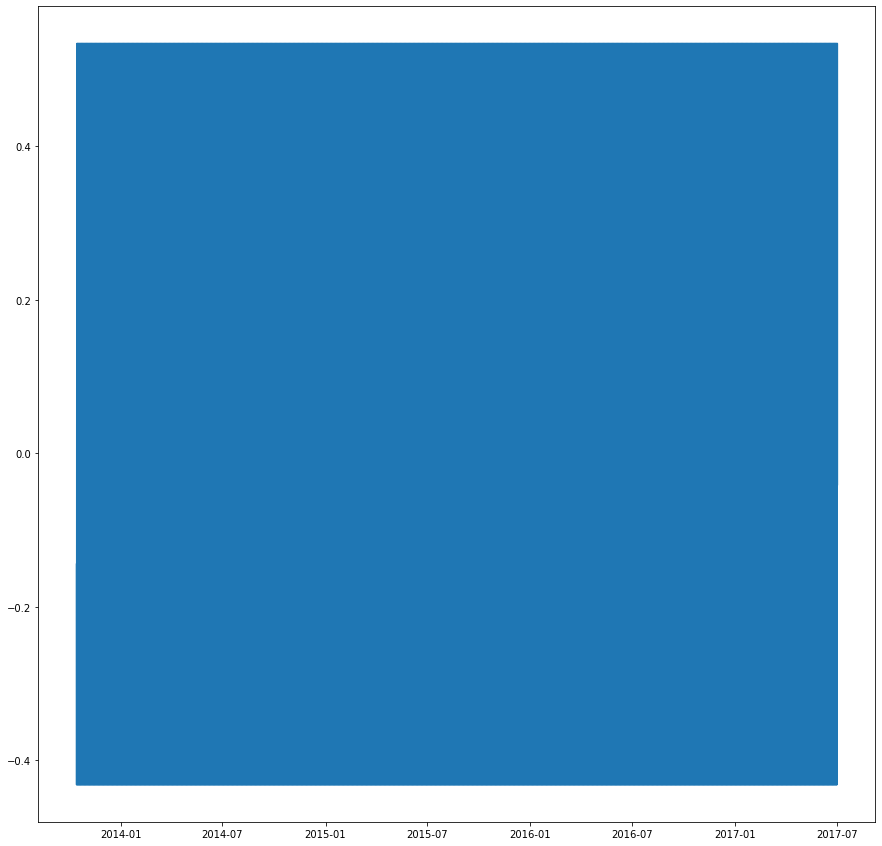

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
# freq = 48 * 30 min = 1 day
Res1_base_seasonal=seasonal_decompose(Res1_base,freq=48)
plt.figure(figsize=(15,15))

plt.plot(Res1_base_seasonal.seasonal)
plt.show()


# this let assume an additive model

Autocorrelation exploration and successive differentitaion with periodicity of 48 (1 day) and 7*48 (1 week)

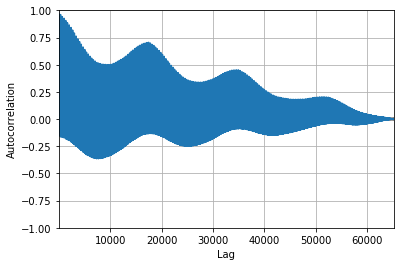

In [39]:
autocorrelation_plot(Res1_base)
#very slowly decreasing autocorrelation

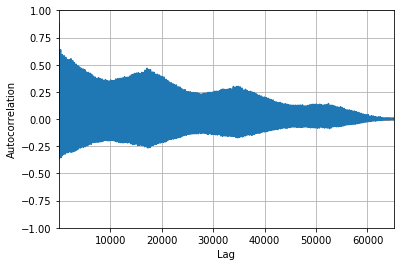

In [40]:
Res1_base_1d=Res1_base.diff(periods=48).dropna()
autocorrelation_plot(Res1_base_1d)
# autocorrelation reduced after first differetiation but still significant

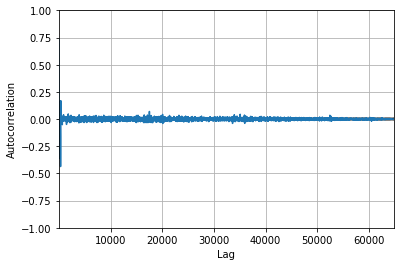

In [41]:
Res1_base_7d=Res1_base_1d.diff(periods=48*7).dropna()
autocorrelation_plot(Res1_base_7d)

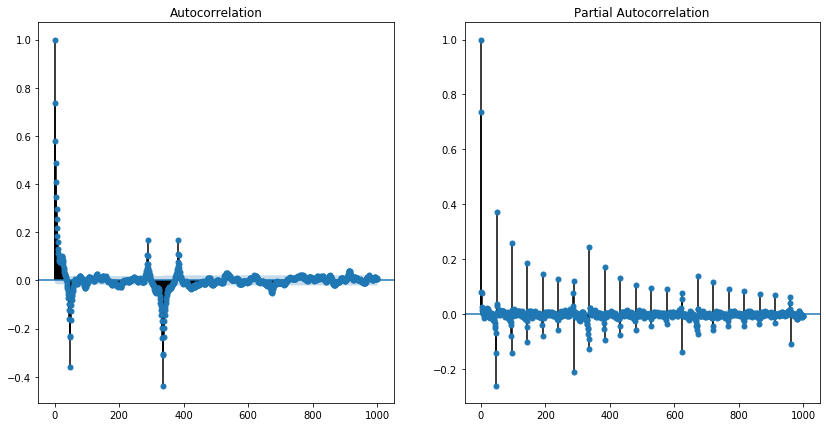

In [31]:
from  statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize= (14,7))
plt.subplot(121)
plot_acf(Res1_base_7d, lags = 1000, ax=plt.gca())
plt.subplot(122)
plot_pacf(Res1_base_7d, lags = 1000, ax=plt.gca())
plt.show()